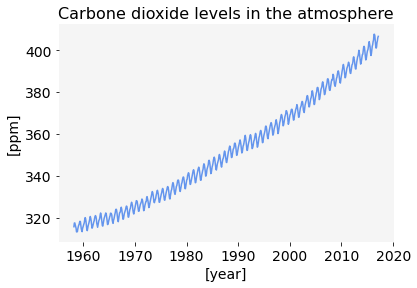

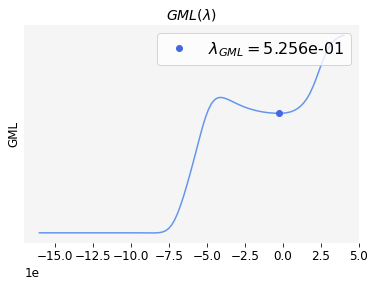

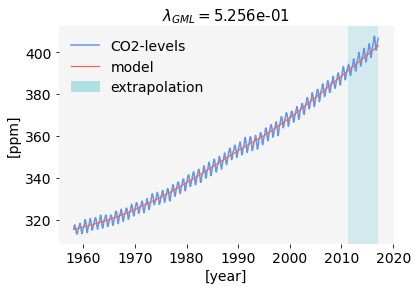

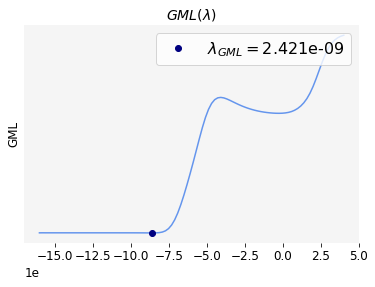

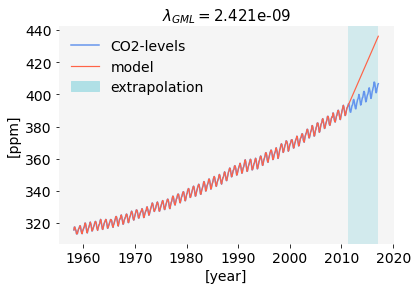

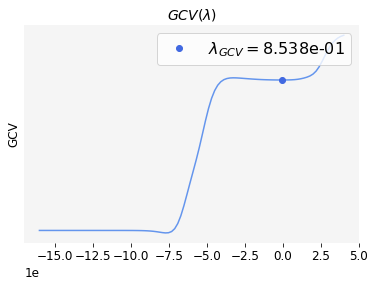

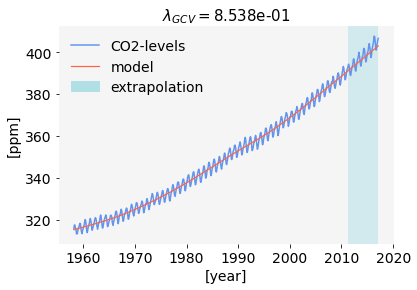

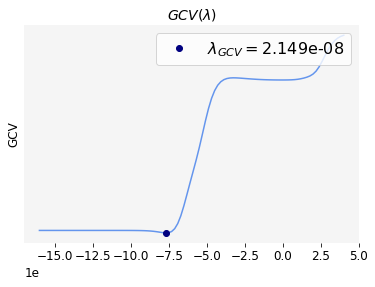

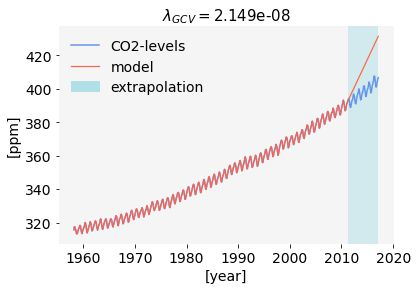

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.special import erfinv
from scipy.optimize import minimize_scalar
import egrss 
import lambda_fun
import os
import matplotlib.patches as mpatches

data = pd.read_csv("archive.csv") 

blue1 = 'cornflowerblue'
blue2 = 'navy'
red = 'tomato'

dates = data['Decimal Date'].to_numpy()
carbon = data['Carbon Dioxide (ppm)'].to_numpy()
dates = dates[np.logical_not(np.isnan(carbon))]
carbon = carbon[np.logical_not(np.isnan(carbon))]

p = 2
N = len(carbon)

f1 = plt.figure()
plt.plot(dates, carbon, color = blue1)
plt.ylabel('[ppm]', fontsize = 14)
plt.xlabel('[year]', fontsize = 14)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Carbone dioxide levels in the atmosphere', fontsize = 16)
for spine in plt.gca().spines.values():
        spine.set_visible(False)
plt.show()
my_path = os.getcwd()
f1.savefig(my_path + "/Plots/Carbonlevels.pdf", bbox_inches='tight')


def plot2_w_lambda_Hawaii(fun, x, y, method, title, ylab, lab, savename1, savename2,  col, bounds = 'nothing'):
    # finding the minimizer
    min_point = fun(N= len(y), x = x, p = 2, yhat = y, method = method,  usage = 'min', bounds= bounds)

    # plotting fun(lambda)
    fig1 = plt.figure()
    q = np.linspace(-4,16,100)
    res = fun(N= len(y), x = x, p = 2, yhat = y, method = 'bounded', usage = 'evaluate',  bounds = bounds,  q = q)
    plt.plot(-q,res, color = 'cornflowerblue')
    plt.plot(-min_point.x, min_point.fun, 'o', color = col , label = lab %(np.format_float_scientific(1/np.power(10,min_point.x), precision = 3, exp_digits=2)))
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    plt.xlabel('1e', loc = 'left', fontsize = 12)
    plt.ylabel(ylab, fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks([])
    plt.title(title , fontsize = 14)
    plt.tick_params(left=True, bottom = True, right = False, top = False)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.legend( loc='upper right', numpoints=1, prop={'size': 16} )
    plt.show
    my_path = os.getcwd()
    fig1.savefig(my_path + savename1, bbox_inches='tight')

    # plotting the model alongside simulated datapoints and y(x)
    a = np.min(x)
    b = np.max(x)
    xi = (b-a) ** (2 * p - 1) 
    lam = 1/np.power(10,min_point.x)
    Ut, Vt = egrss.generators((x-a)/(b-a),p)
    Wt, z  = egrss.potrf(Ut,Vt,N*lam/xi)
    c,d    = lambda_fun.smoothing_spline_reg(Ut,Wt,z,carbon)
    yt_local, c, ct = lambda_fun.extrapolate(dates[0:int(len(carbon)-len(carbon)*0.1)], carbon[0:int(len(carbon)-len(carbon)*0.1)], dates, dates[0], dates[-1], p, N, lam)
    f1 = plt.figure()
    plt.plot(dates, carbon, color = blue1)
    plt.plot(dates,yt_local,color = 'tomato', linewidth=1.2)
    plt.axvspan(dates[int(len(carbon)-len(carbon)*0.1)], dates[-1], facecolor='powderblue', alpha=0.5)
    red_patch = mpatches.Patch(color='powderblue', label='extrapolation')
    f1.legend(handles=[red_patch], bbox_to_anchor=(0.48, 0.67), loc="center right", borderaxespad=0.2,prop = {'size': 14}, frameon = False)
    plt.ylabel('[ppm]', fontsize = 14)
    plt.xlabel('[year]', fontsize = 14)
    plt.legend(['CO2-levels', 'model'], numpoints = 1, prop = {'size': 14}, loc = 'upper left', frameon = False)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    for spine in plt.gca().spines.values():
            spine.set_visible(False)
    plt.title(lab %(np.format_float_scientific(1/np.power(10,min_point.x), precision = 3, exp_digits=2)), fontsize = 15)
    plt.show()
    f1.savefig(my_path + savename2, bbox_inches='tight')

# finding local minimizer
plot2_w_lambda_Hawaii(fun = lambda_fun.min_GML, x = dates, y = carbon, method = 'golden', title ='$GML(\lambda)$' , ylab = 'GML', lab = "$\lambda_{GML}=$%s", savename1 = "/Plots/GMLlambdaH_loc.pdf", savename2 = "/Plots/GMLmodelH_loc.pdf", col = 'royalblue' ,bounds = 'nothing')

# finding GML min 
plot2_w_lambda_Hawaii(fun = lambda_fun.min_GML, x = dates, y = carbon, method = 'bounded', title ='$GML(\lambda)$' , ylab = 'GML', lab = "$\lambda_{GML}=$%s", savename1 = "/Plots/GMLlambdaH.pdf", savename2 = "/Plots/GMLmodelH.pdf", col = 'navy', bounds = (6,16))

# finding local minimizer
plot2_w_lambda_Hawaii(fun = lambda_fun.min_GCV, x = dates, y = carbon, method = 'golden', title ='$GCV(\lambda)$' , ylab = 'GCV', lab = "$\lambda_{GCV}=$%s", savename1 = "/Plots/GCVlambdaH_loc.pdf", savename2 = "/Plots/GCVmodelH_loc.pdf",  col = 'royalblue' , bounds = 'nothing')

# finding GCV min 
plot2_w_lambda_Hawaii(fun = lambda_fun.min_GCV, x = dates, y = carbon, method = 'bounded', title ='$GCV(\lambda)$' , ylab = 'GCV', lab = "$\lambda_{GCV}=$%s", savename1 = "/Plots/GCVlambdaH.pdf", savename2 = "/Plots/GCVmodelH.pdf",  col = 'navy' ,bounds = (6,16))
    